In [1]:
# data tools
import numpy as np
import pandas as pd

In [2]:
# visualisation tools
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
col_names = [
    "Wine class",
    "Alcohol",
 	"Malic acid",
 	"Ash",
	"Alcalinity of ash", 
 	"Magnesium",
	"Total phenols",
 	"Flavanoids",
 	"Nonflavanoid phenols",
 	"Proanthocyanins",
	"Color intensity",
 	"Hue",
 	"OD280/OD315 of diluted wines",
 	"Proline"           ]

In [5]:
df = pd.read_csv("wine.data", names=col_names)

In [6]:
df.head()

,Wine class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
# adjust position of the target column
df = df.reindex(list(df.columns[1:]) + list(df.columns[:1]), axis=1)
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


# Understanding the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  Wine 

In [9]:
df.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [10]:
df.skew()

Alcohol                        -0.051482
Malic acid                      1.039651
Ash                            -0.176699
Alcalinity of ash               0.213047
Magnesium                       1.098191
Total phenols                   0.086639
Flavanoids                      0.025344
Nonflavanoid phenols            0.450151
Proanthocyanins                 0.517137
Color intensity                 0.868585
Hue                             0.021091
OD280/OD315 of diluted wines   -0.307285
Proline                         0.767822
Wine class                      0.107431
dtype: float64

 - Alcohol, Flavanoids, Total Phenols and Hue have very little skew.
 - They could vary normally

In [11]:
df["Wine class"].value_counts()

2    71
1    59
3    48
Name: Wine class, dtype: int64

# Exploritory data visualisation

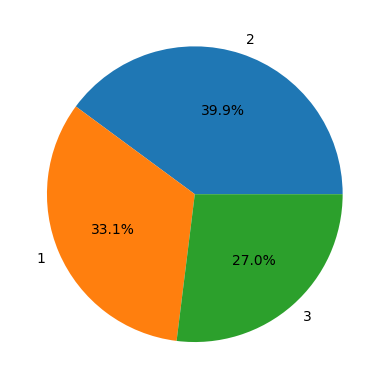

In [12]:
plt.pie(x=df["Wine class"].value_counts(), labels=df["Wine class"].value_counts().index, autopct='%1.1f%%');

- there is variation in the amount of data points for each target class
- Oversampling should be used before the model

## Statistical overview of individual feature's distributions

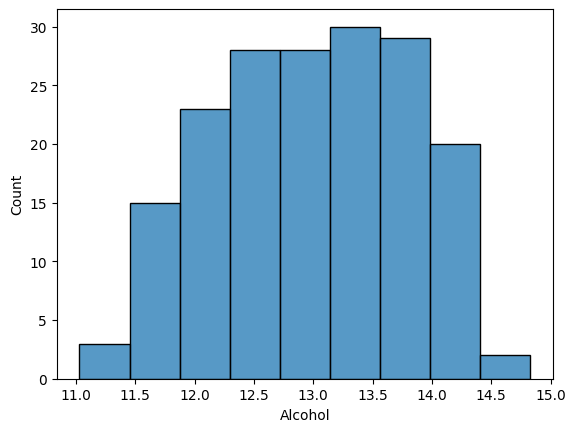

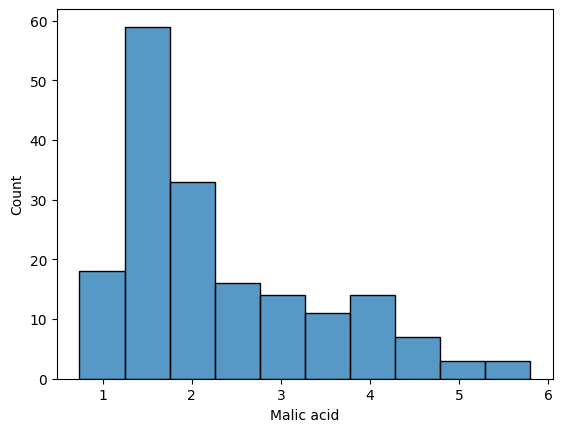

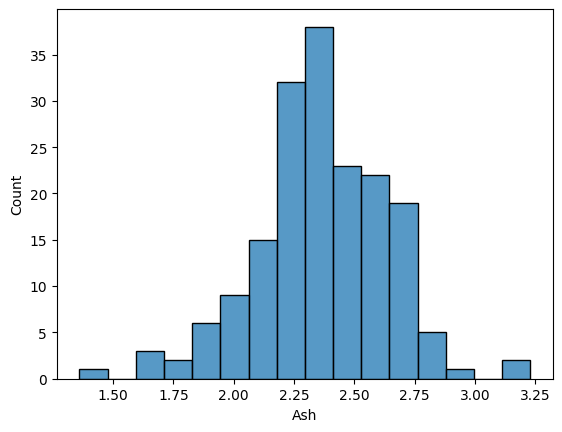

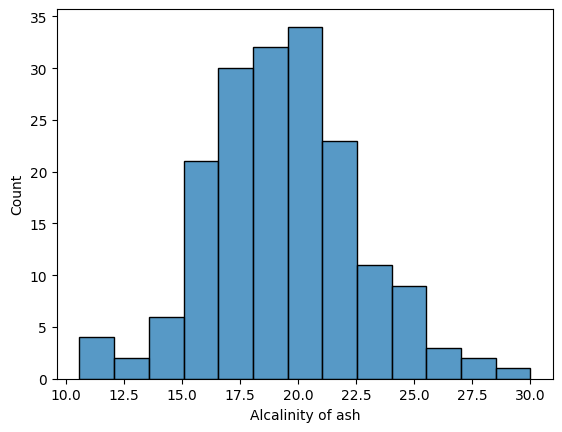

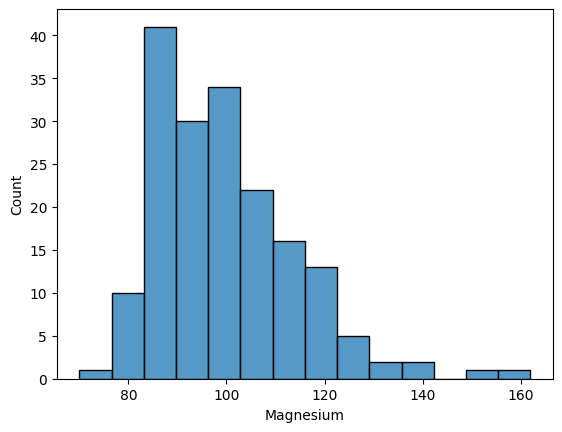

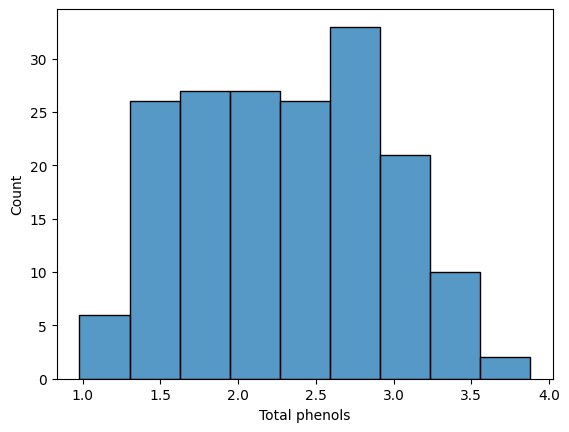

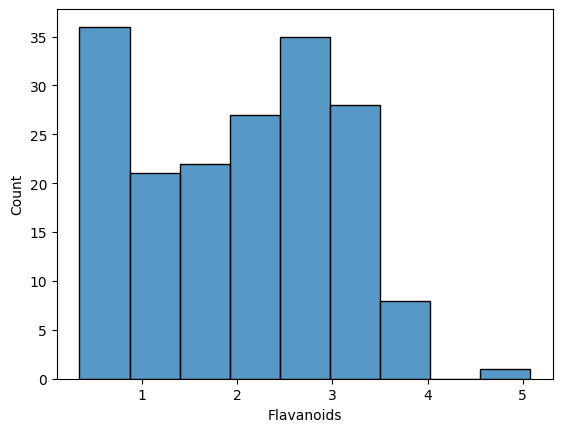

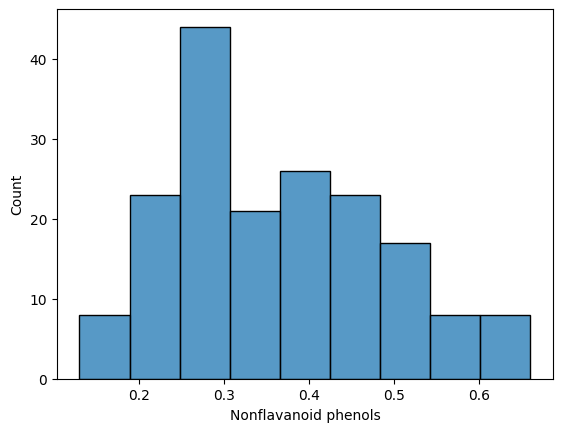

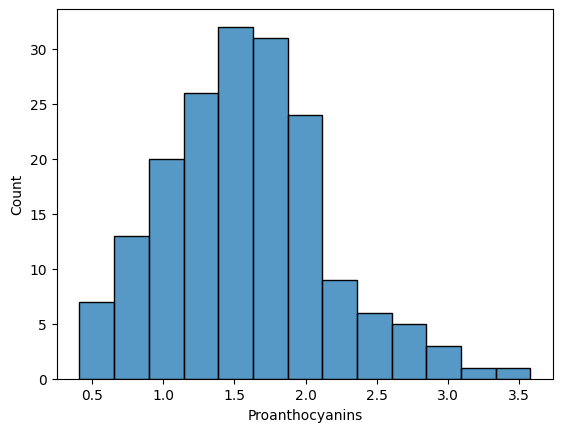

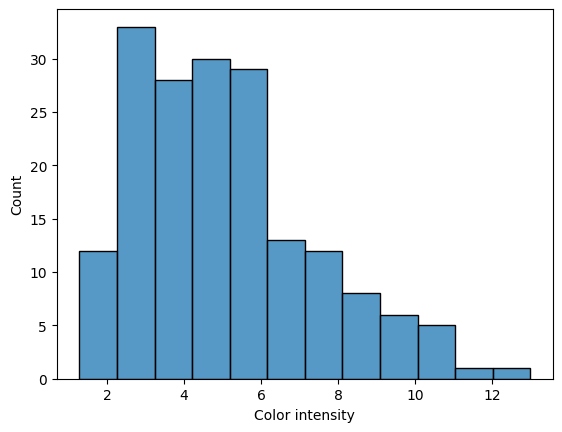

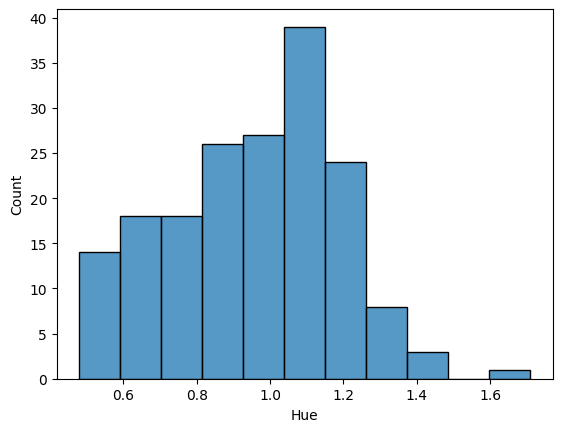

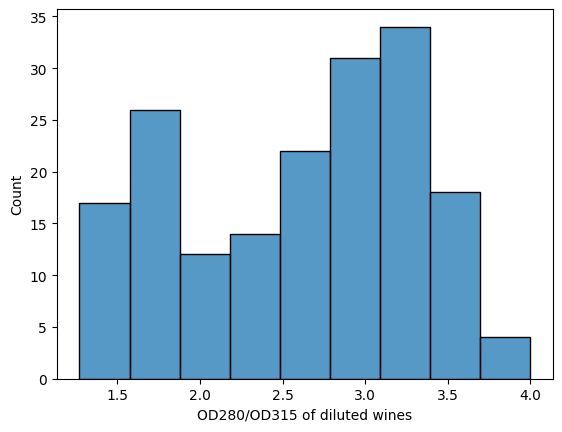

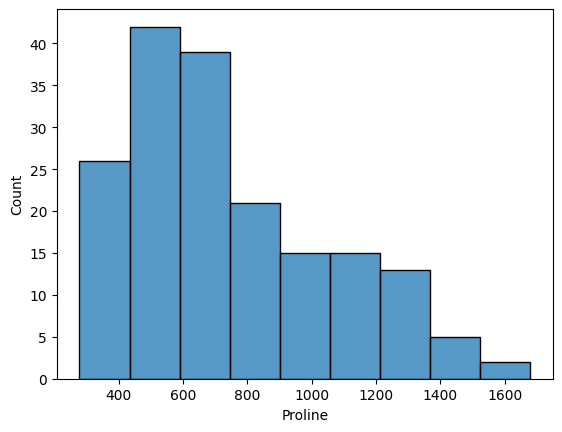

In [13]:
for feature in df.columns[:-1]:
    plt.subplots()
    sns.histplot(data=df, x=feature)

- as expected alcohol, flavanoids, total phenol and hue are very symmetrical although the flavanoids does not seem to be normally distributed
- Most of the other feautures also seem normally distributed with a significant skew

## Comparisons between different features

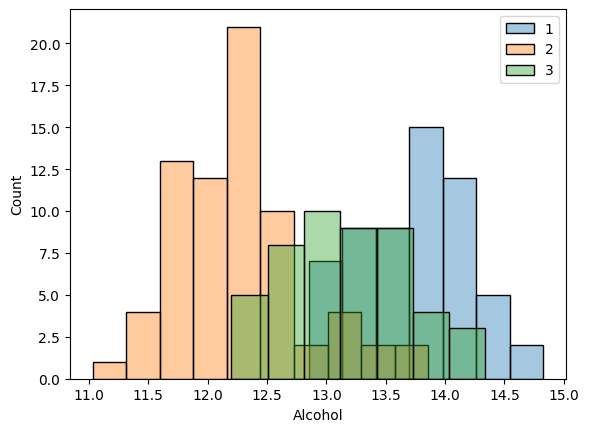

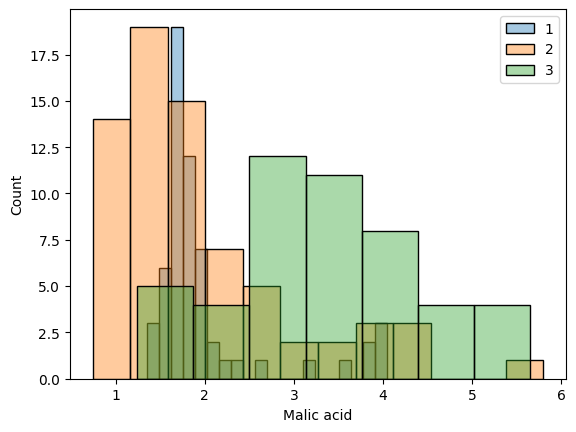

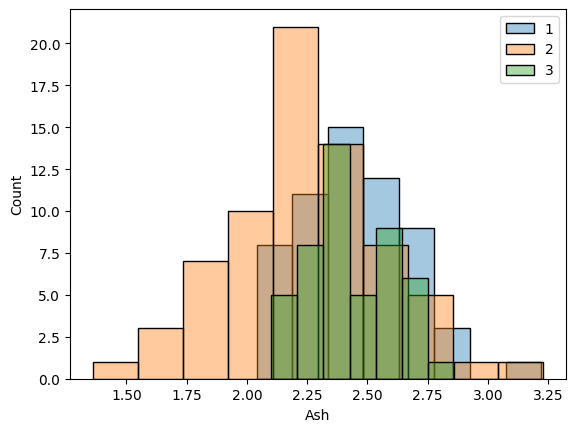

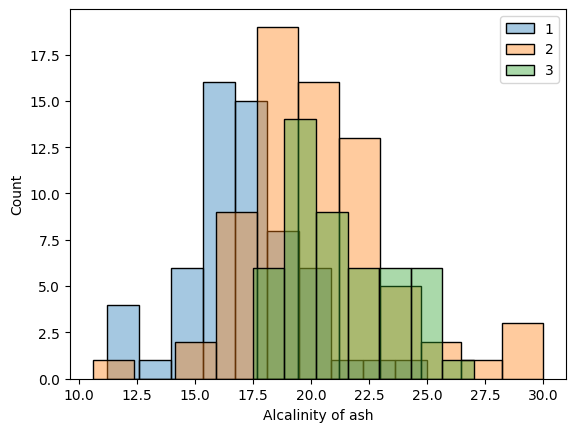

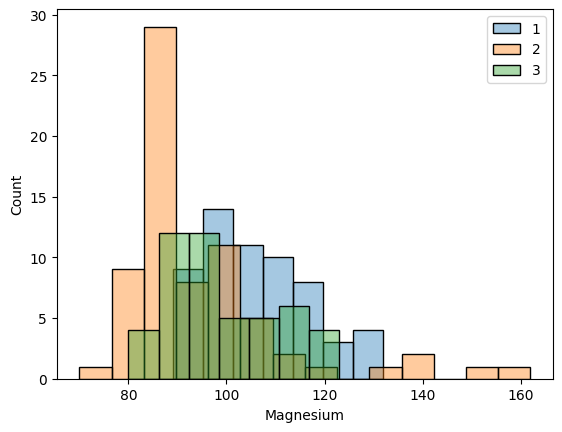

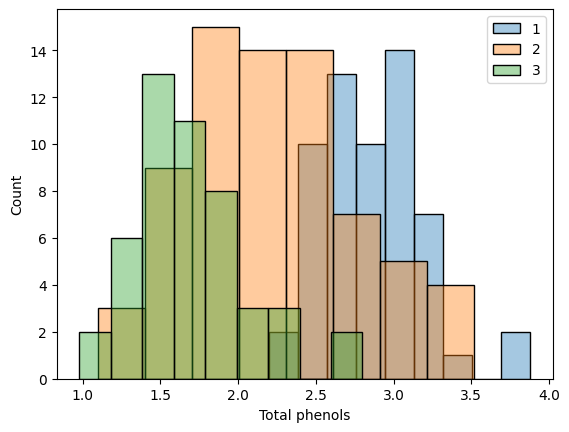

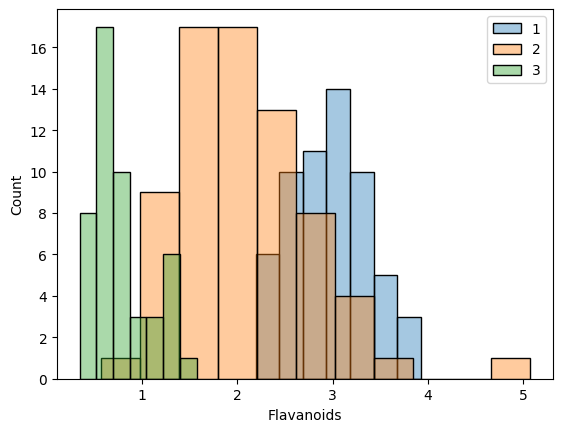

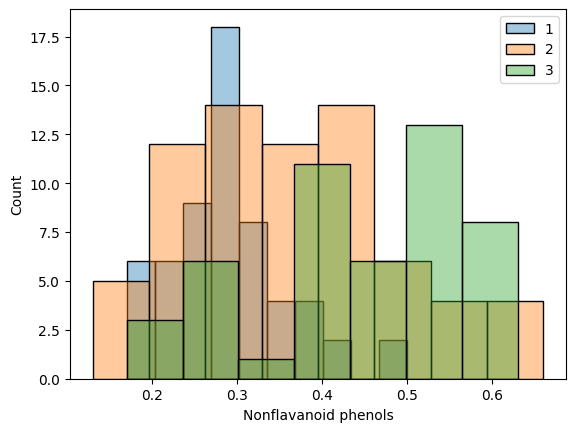

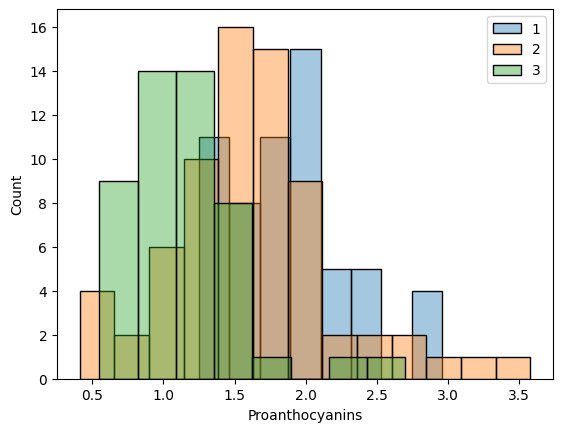

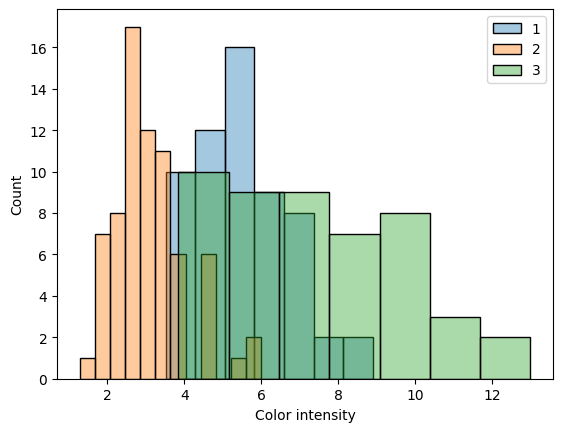

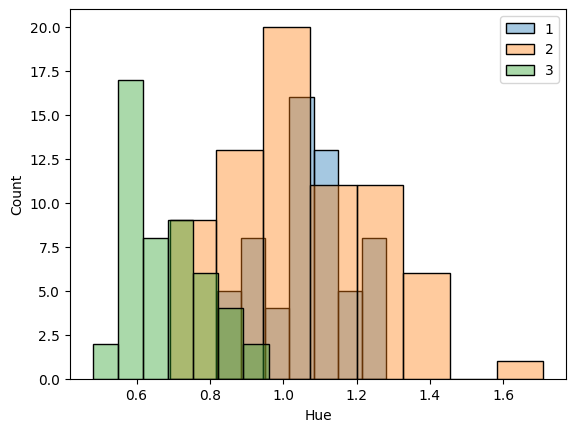

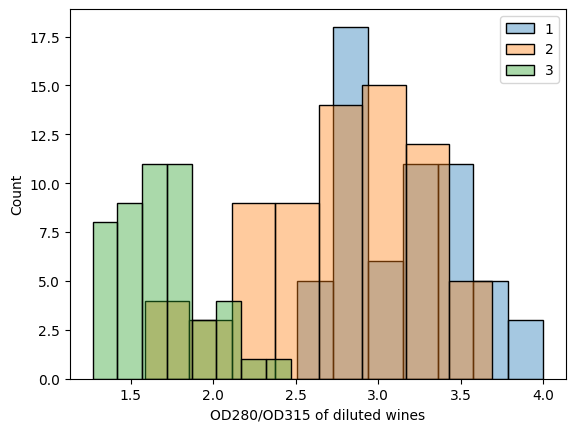

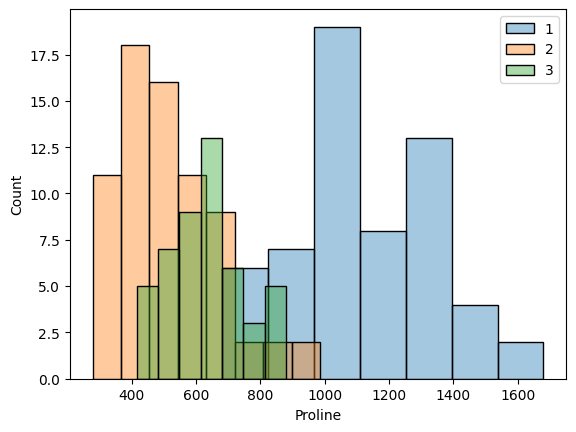

In [14]:
for feature in df.columns[:-1]:
    plt.subplots()
    for wineClass in df["Wine class"].unique():
        sns.histplot(data=df[df["Wine class"] == wineClass], x=feature, alpha=0.4, label=wineClass)
        plt.legend()

- As expected a lot of the skew came from the sum of separate less skewed normally distributions for each class

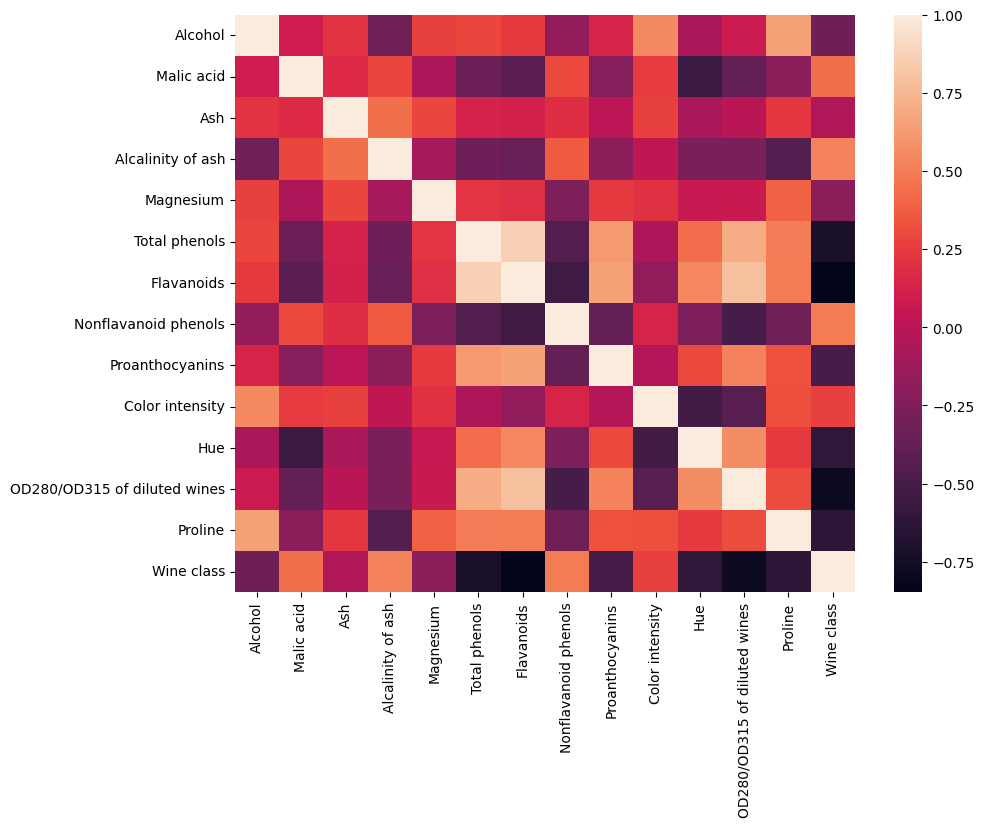

In [15]:
plt.figure(figsize=(10, 7.5))
ax = sns.heatmap(df.corr(), annot=False)

- Flavanoids seem to be a good determiner of the class (i guess sommeliers are not all frauds)
- Alcohol seems fairly uncorrelated with malic acid, a scatterplot of the 2 could reveal interesting things
- Total phenols and flavanoids are highly correlated, i assume said flavanoids are a subset of the phenols

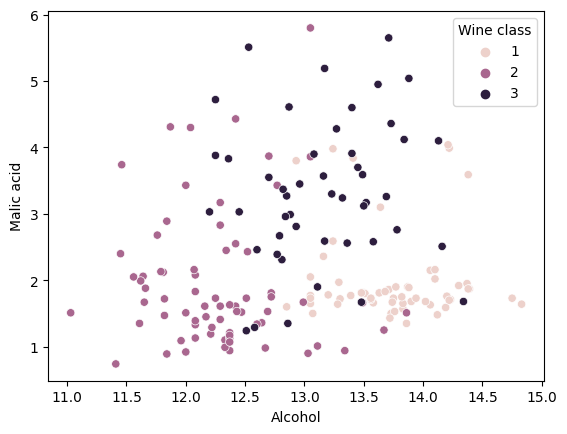

In [16]:
sns.scatterplot(df, x="Alcohol", y="Malic acid", hue="Wine class");

- as expected, the scatterplot reveals interesting groupings of the data points
- the groupings are not perfect and could probably be improved with better pair of features
- Interesting that there is such a clear relationship between alcohol content and cultivar of grape

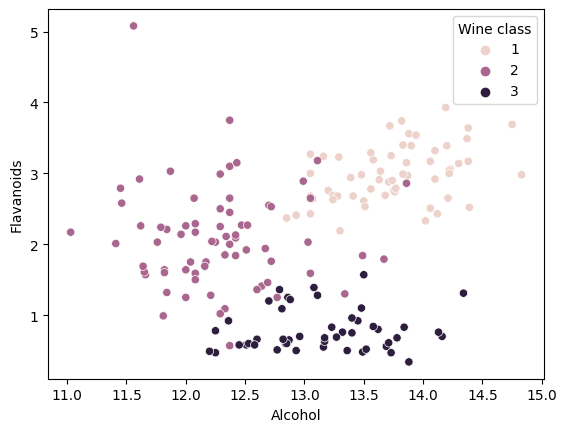

In [17]:
sns.scatterplot(df, x="Alcohol", y="Flavanoids", hue="Wine class");

- switching malic acid for flavanoids which seems to be a good target class predictor gives a much better group separation
- There seems to be a singular outlier in wine class 2

## Dimension reduction of features

In [18]:
from sklearn.decomposition import PCA

In [19]:
decomposer = PCA(n_components=3)

In [20]:
reduced_data = decomposer.fit_transform(df.iloc[:, :-1])

In [21]:
decomposer.explained_variance_ratio_

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05])

- a vast majority of the variance seem to be explained by just the first dimension
- I expect models to have an easy time with this data set

<Axes: >

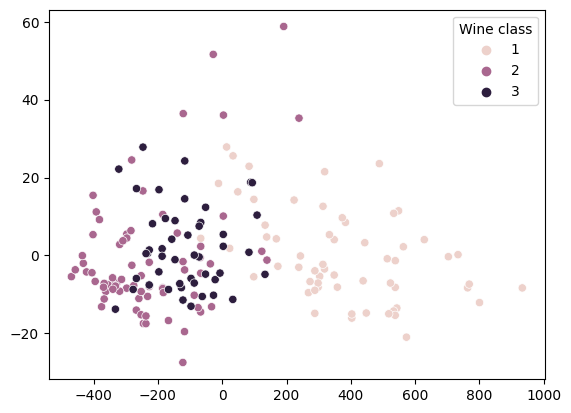

In [22]:
sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1],hue=df["Wine class"])

- the plot between the dimensions is not as good as expected
- potentially because of how well explained the variance is by the first dimension

In [23]:
first_decomposer = PCA(n_components=1)
second_decomposer = PCA(n_components=1)

Reducing the dimensions but using only the first 9 features
- The first 5 together capture the alcohol, acidity, alkalinity and minerals
- The next 4 capture existence of more complex organic materials

In [24]:
acid_data = first_decomposer.fit_transform(df.values[:, :5])
organic_data = second_decomposer.fit_transform(df.values[:, 5:9])

In [25]:
print(first_decomposer.explained_variance_ratio_)
print(second_decomposer.explained_variance_ratio_)

[0.94015339]
[0.8552009]


<Axes: >

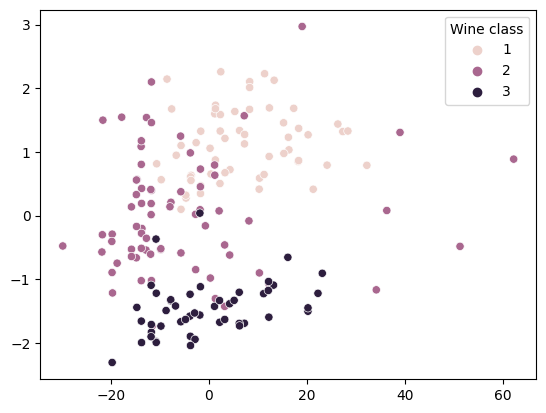

In [26]:
sns.scatterplot(x=acid_data[:,0], y=organic_data[:,0],hue=df["Wine class"])

- Redoing the scatterplot with reduced dimensions is better than the last
- The alcohol/flavanoids plot is still muh better though

In [27]:
# data division tools
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [28]:
X = df.values[:, :-1]
y = df.values[:, -1]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
ros = RandomOverSampler()
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# Models

In [31]:
from sklearn.pipeline import Pipeline 

In [32]:
from sklearn.preprocessing import Normalizer

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
normalizer = ("normalizer", Normalizer())
models = [MultinomialNB(), DecisionTreeClassifier(), KNeighborsClassifier(), SVC(), RandomForestClassifier()]

for model in models:
    pipe = Pipeline([normalizer, (str(model)[:-2], model)])
    pipe.fit(X_train_res, y_train_res)
    y_pred = pipe.predict(X_test)
    print(f"Model {str(model)[:-2]}", end="\n\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Model MultinomialNB

[[15  0  0]
 [ 8  6  4]
 [ 4  1  7]]
              precision    recall  f1-score   support

         1.0       0.56      1.00      0.71        15
         2.0       0.86      0.33      0.48        18
         3.0       0.64      0.58      0.61        12

    accuracy                           0.62        45
   macro avg       0.68      0.64      0.60        45
weighted avg       0.70      0.62      0.59        45

Model DecisionTreeClassifier

[[15  0  0]
 [ 1 14  3]
 [ 0  1 11]]
              precision    recall  f1-score   support

         1.0       0.94      1.00      0.97        15
         2.0       0.93      0.78      0.85        18
         3.0       0.79      0.92      0.85        12

    accuracy                           0.89        45
   macro avg       0.89      0.90      0.89        45
weighted avg       0.90      0.89      0.89        45

Model KNeighborsClassifier

[[13  1  1]
 [ 3 15  0]
 [ 0  4  8]]
              precision    recall  f1-score   su

- Naive bayes and SVM are rather disappointing.
- K Nearest Neighnours is surprisingly good lack of any tuning
- All of that is irrelevant because Random Forest is perfect on the data set